In [1]:
!pip install diffusers==0.31.0 transformers accelerate safetensors
!pip install torch torchvision matplotlib --index-url https://download.pytorch.org/whl/cu121

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.1
    Uninstalling diffusers-0.35.1:
      Successfully uninstalled diffusers-0.35.1
Looking in indexes: https://download.pytorch.org/whl/cu121


In [1]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import random
import os

In [2]:
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.enable_attention_slicing()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [4]:
def generate_and_show(prompts, guidance_scale=7.5, steps=30, num_images=1, seed=None):
    if seed is None:
        seed = random.randint(0, 999999)
    generator = torch.manual_seed(seed)

    images = []
    for prompt in prompts:
        with torch.autocast(device):
            out = pipe(prompt, guidance_scale=guidance_scale,
                       num_inference_steps=steps,
                       generator=generator,
                       num_images_per_prompt=num_images)
            images.extend(out.images)

    cols = num_images if len(prompts) == 1 else len(prompts)
    rows = len(prompts) if num_images == 1 else 1
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))

    if rows == 1 and cols == 1:
        axes.imshow(images[0])
        axes.axis("off")
    elif rows == 1:
        for i, ax in enumerate(axes):
            ax.imshow(images[i])
            ax.axis("off")
    elif cols == 1:
        for i, ax in enumerate(axes):
            ax.imshow(images[i])
            ax.axis("off")
    else:
        k = 0
        for i in range(rows):
            for j in range(cols):
                axes[i, j].imshow(images[k])
                axes[i, j].axis("off")
                k += 1

    plt.show()

    os.makedirs("outputs", exist_ok=True)
    for idx, img in enumerate(images):
        filename = f"outputs/gen_{seed}_{idx}.png"
        img.save(filename)
        print(f"✅ Saved {filename}")

  0%|          | 0/30 [00:00<?, ?it/s]

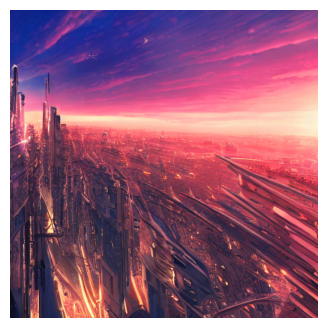

✅ Saved outputs/gen_42_0.png


In [5]:
generate_and_show(
    prompts=["A futuristic city at sunset, ultra detailed, cinematic, 8k"],
    guidance_scale=7.5,
    steps=30,
    num_images=1,
    seed=42
)

  0%|          | 0/40 [00:00<?, ?it/s]

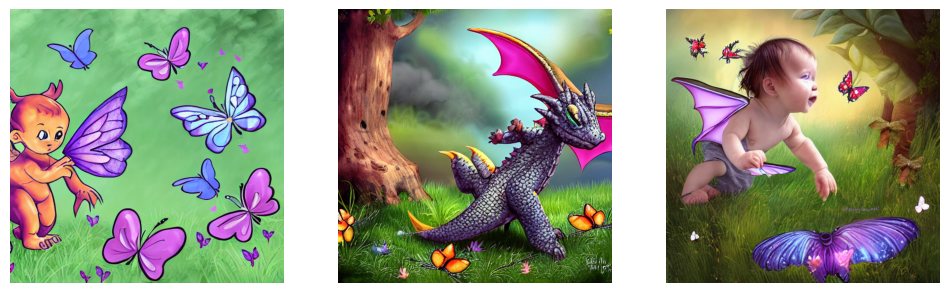

✅ Saved outputs/gen_123_0.png
✅ Saved outputs/gen_123_1.png
✅ Saved outputs/gen_123_2.png


In [6]:
generate_and_show(
    prompts=["A cute baby dragon playing with butterflies, digital art"],
    guidance_scale=8.0,
    steps=40,
    num_images=3,
    seed=123
)

  0%|          | 0/30 [00:00<?, ?it/s]

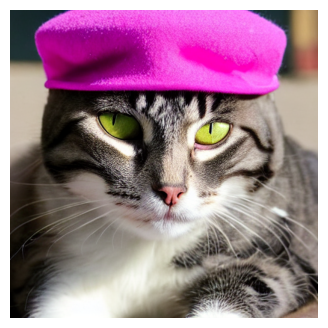

✅ Saved outputs/gen_42_0.png


In [7]:
generate_and_show(
    prompts=["A cat wears a pink hat"],
    guidance_scale=7.5,
    steps=30,
    num_images=1,
    seed=42
)